# Practice notebook for multivariate analysis using NHANES data

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.317497,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.298392
BPXDI1,0.317497,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.298392,0.884722,1.000000


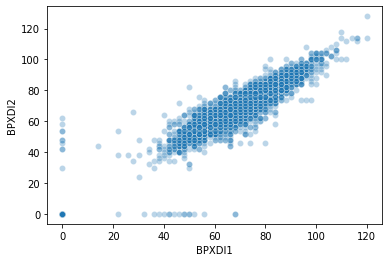

In [40]:
sns.scatterplot(data = da,x='BPXDI1',y='BPXDI2',alpha = 0.3)
focus = ['BPXSY1','BPXSY2','BPXDI1','BPXDI2']
da[focus].dropna().corr()

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

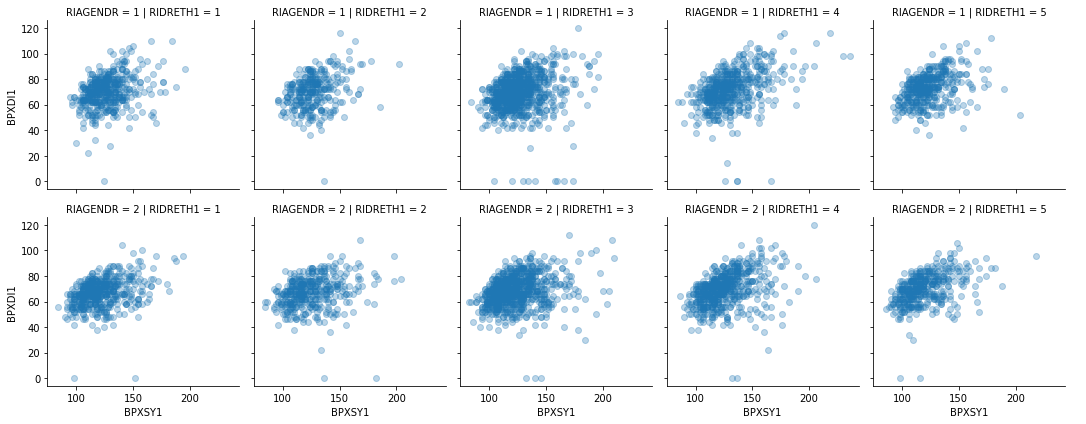

In [41]:
sns.FacetGrid(da, col = "RIDRETH1",row = "RIAGENDR").map(plt.scatter,"BPXSY1","BPXDI1",alpha = 0.3).add_legend()

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

<AxesSubplot:xlabel='GENDER', ylabel='DMDEDUC2'>

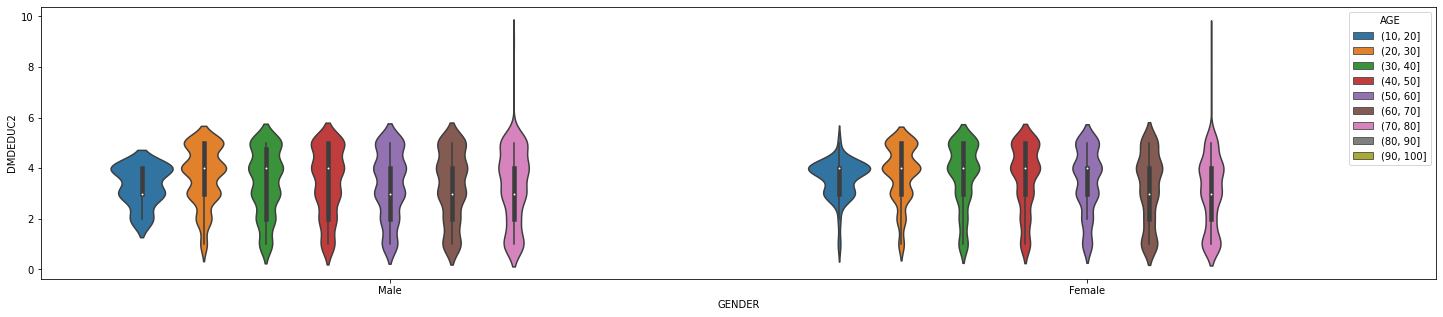

In [42]:
da["GENDER"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
da["AGE"] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80,90,100])
plt.figure(figsize = (25,5))
sns.violinplot(x = da.GENDER,y = da.DMDEDUC2,hue = da.AGE)

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

<AxesSubplot:xlabel='GENDER', ylabel='BMXBMI'>

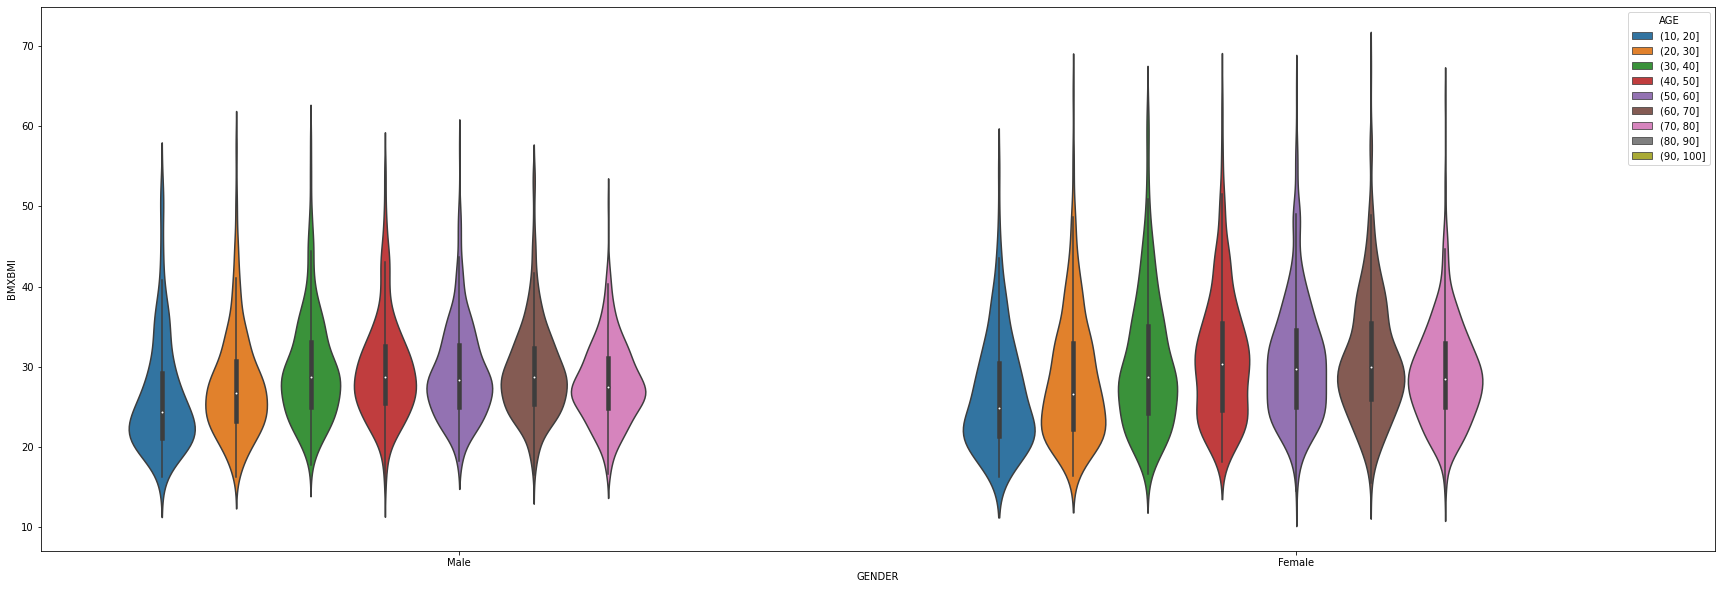

In [43]:
plt.figure(figsize = (30,10))
sns.violinplot(x = da.GENDER,y = da.BMXBMI,hue = da.AGE)

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [44]:
da.groupby(["RIDRETH1","HIQ210"]).size().unstack().fillna(0).apply(lambda x:x/x.sum(),axis = 1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516
